In [1]:
#import Tensorflow library
import tensorflow as tf
print(tf.__version__)

2.5.0


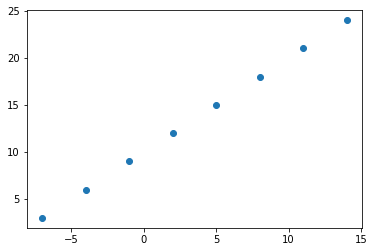

In [2]:
#Creating data to view and fit

import numpy as np
import matplotlib.pyplot as plt

#create fetaures
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X, y);


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our numpy arrays into tensor with dtype --> float64
# = tf.constant(X) # --> dtype float64
# = tf.constant(y) # --> dtype float64
#, y # --> checking the dtype

# Turn our numpy arrays into tensor with dtype --> float64
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

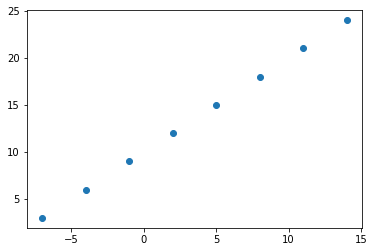

In [12]:
plt.scatter(X, y)

# Step in modelling with TersoFlow

In [13]:
# Set random seed
tf.random.set_seed(42)

#Create a model using sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short name for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short name for stochastic gradient descent
              metrics=["mae"]
             )

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 596ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [16]:
y_pred + 11

array([[23.71602]], dtype=float32)

# Improving our model

In [17]:
# Let's rebuild our model

# 1. Cretae the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

# 3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 546ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

In [18]:
# Remind ourselfs of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# let's see if our model prediction has improved ?
model.predict([17.0])

array([[29.739855]], dtype=float32)

# Try another way with activated 'relu' to improve our model

In [20]:
# Let's see if we can make another to improving our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 697ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 3.7194 - mae: 3.7194
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 3.6705 - mae: 3.6705
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7299 - ma

In [21]:
# Let's remind  ourselfes of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a predict
model.predict([17.0])

array([[31.223137]], dtype=float32)


# Try another way with activated 'relu' & change optimizer to 'Adam' to improve our model

In [23]:
# Let's see if we can make another to improving our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # put learning rate 'lr' by default = 0.01 
              metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=100)

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 0s 466ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

1/1 [==============================] - 0s 6ms/step - loss: 0.1632 - mae: 0.1632
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1497 - mae: 0.1497
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2270 - mae: 0.2270
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1988 - mae: 0.1988
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2866 - mae: 0.2866
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2691 - mae: 0.2691
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3802 - mae: 0.3802
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3505 - mae: 0.3505
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1934 - mae: 0.1934
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4458 - mae: 0.4458
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4780 - ma

In [24]:
# Let's remind  ourselfes of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's try to make a predict
model.predict([17.0])

array([[26.43606]], dtype=float32)

# Evaluating data 

In [26]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [27]:
# Make a labels for datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

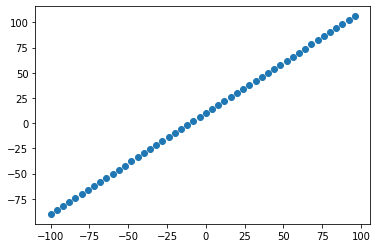

In [28]:
plt.scatter(X, y)

In [29]:
# Check the length of how many samples we have
len(X)

50

# Data Split

In [30]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are tsting samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

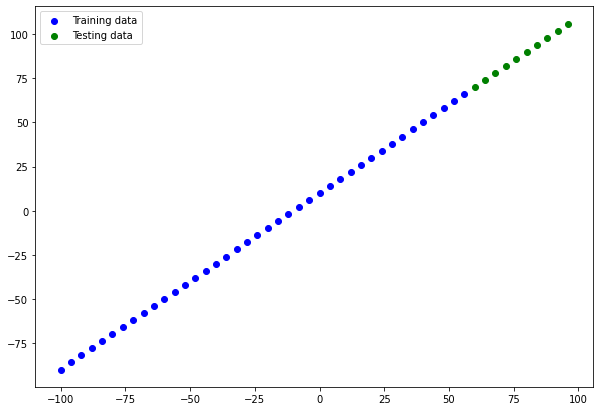

In [58]:
plt.figure(figsize=(10, 7))
# Plot training date in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, waht's y ?)
# Show a legend
plt.legend();

In [93]:
# Let's have a look at how to build a neural network for our data 

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="ouput_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

In [94]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
ouput_layer (Dense)          (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params - total number of parameters in the model.
Trainable parameters - these are parameters (pattern) the model can update as it trains. 

In [95]:
# Let's fit our model to the training data 
model.fit(X_train, y_train, epochs=100, verbose=0)

In [96]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
ouput_layer (Dense)          (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


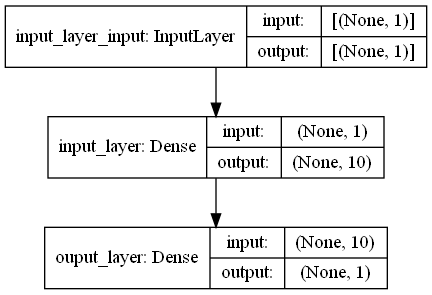

In [97]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualizing our modelpredictions

In [98]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 78.242004],
       [ 83.3428  ],
       [ 88.4436  ],
       [ 93.54441 ],
       [ 98.64522 ],
       [103.74602 ],
       [108.84683 ],
       [113.94764 ],
       [119.04844 ],
       [124.14925 ]], dtype=float32)

In [99]:
y_test, X_test, y_train, X_train

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>)

In [100]:
# Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plot's training data, test data and compares predictions to ground truth labels. 
    """
    #plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
    # Plot test data in green
    #plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, waht's y ?)
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's prediction in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show legend's
    plt.legend();

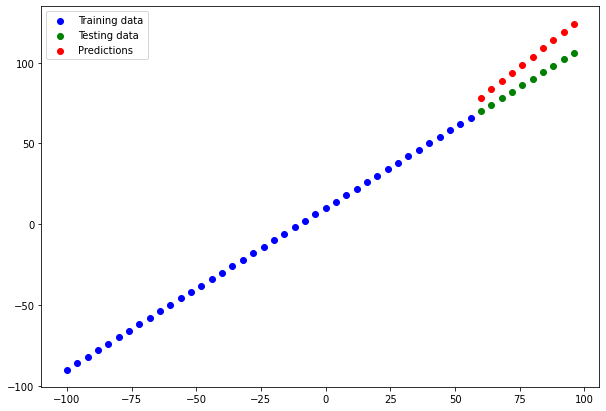

In [101]:
plot_prediction()

# Evaluating our model's prediction with regression evaluations metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model performance.
Since we're working on a regression, two the main of metrics:
1. MAE-mean abolute error, "on average, how wrong is each of my models predictions"
2. MSE-mean sequare error, "square the average error"

In [102]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 249ms/step - loss: 13.1956 - mae: 13.1956


[13.195623397827148, 13.195623397827148]

In [106]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.303198, 10.531441, 10.      , 10.708882, 12.78713 , 16.196814,
       20.846832, 25.947638, 31.048437, 36.149246], dtype=float32)>

In [103]:
y_pred

array([[ 78.242004],
       [ 83.3428  ],
       [ 88.4436  ],
       [ 93.54441 ],
       [ 98.64522 ],
       [103.74602 ],
       [108.84683 ],
       [113.94764 ],
       [119.04844 ],
       [124.14925 ]], dtype=float32)

In [104]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [108]:
y_test - y_pred, y_pred - y_test 

(<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
 array([[ -8,  -4,   0,   4,   8,  12,  16,  20,  24,  28],
        [-13,  -9,  -5,  -1,   3,   7,  11,  15,  19,  23],
        [-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18],
        [-23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13],
        [-28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8],
        [-33, -29, -25, -21, -17, -13,  -9,  -5,  -1,   3],
        [-38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2],
        [-43, -39, -35, -31, -27, -23, -19, -15, -11,  -7],
        [-49, -45, -41, -37, -33, -29, -25, -21, -17, -13],
        [-54, -50, -46, -42, -38, -34, -30, -26, -22, -18]])>,
 <tf.Tensor: shape=(10, 10), dtype=int32, numpy=
 array([[  8,   4,   0,  -4,  -8, -12, -16, -20, -24, -28],
        [ 13,   9,   5,   1,  -3,  -7, -11, -15, -19, -23],
        [ 18,  14,  10,   6,   2,  -2,  -6, -10, -14, -18],
        [ 23,  19,  15,  11,   7,   3,  -1,  -5,  -9, -13],
        [ 28,  24,  20,  16,  12,   8,   4,   0,  -4,  -8],

In [110]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.242004,  83.3428  ,  88.4436  ,  93.54441 ,  98.64522 ,
       103.74602 , 108.84683 , 113.94764 , 119.04844 , 124.14925 ],
      dtype=float32)>

In [111]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.195621>

In [112]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 227.21848,  153.68954,  132.19678,  162.7405 ,  245.32068,
        379.93707,  566.59045,  805.27997, 1096.0056 , 1438.768  ],
      dtype=float32)>

In [113]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=184.12154>

In [114]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test,
                                         y_pred=tf.squeeze(y_pred))

In [118]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 7ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 8

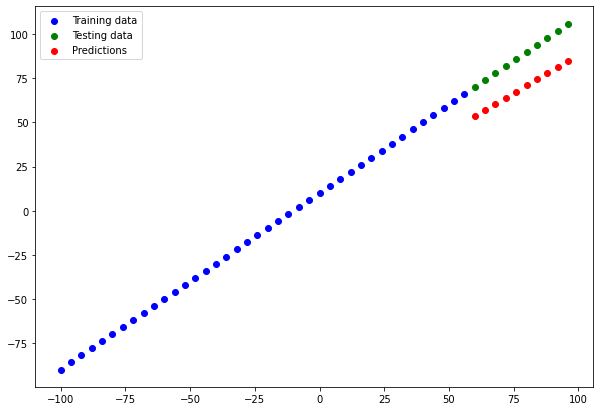

In [120]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_prediction(predictions=y_preds_1)

In [122]:
# Calculate model_1 evluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [123]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 2ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 6m

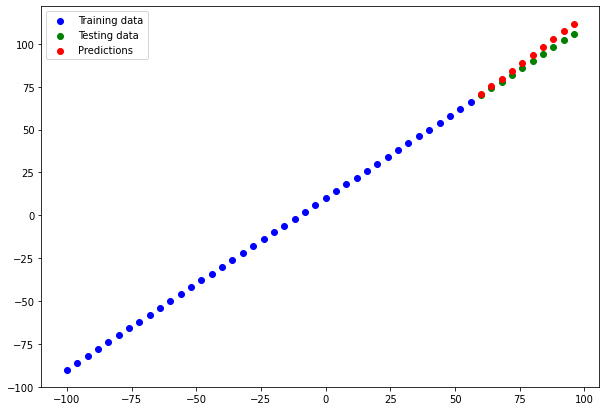

In [124]:
# Make and plot prediction for model_2
y_preds_2=model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [125]:
# Calculate model_1 evluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [126]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 16.5279 - mae: 16.5279
Epoch 174/500
2/2 [==============================] - 0s 3ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 4ms/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 3ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 3ms/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 2ms/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 3ms/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [==============================] - 0s 4ms/step - loss: 7.8992 - mae: 7.8992
Epoch 181/500
2/2 [==============================] - 0s 3ms/step - loss: 17.4015 - mae: 17.4015
Epoch 182/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0089 - mae: 11.0089
Epoch 183/500
2/2 [==============================] - 0s 5ms/

Epoch 259/500
2/2 [==============================] - 0s 4ms/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 12ms/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 2ms/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 3ms/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [==============================] - 0s 4ms/step - loss: 21.0154 - mae: 21.0154
Epoch 265/500
2/2 [==============================] - 0s 4ms/step - loss: 19.3730 - mae: 19.3730
Epoch 266/500
2/2 [==============================] - 0s 3ms/step - loss: 11.4735 - mae: 11.4735
Epoch 267/500
2/2 [==============================] - 0s 4ms/step - loss: 7.5302 - mae: 7.5302
Epoch 268/500
2/2 [==============================] - 0s 5ms/step - loss: 21.6453 - mae: 21.6453
Epoch 269/500
2/2 [==========================

Epoch 430/500
2/2 [==============================] - 0s 2ms/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 2ms/step - loss: 10.6153 - mae: 10.6153
Epoch 432/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4582 - mae: 11.4582
Epoch 433/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3851 - mae: 11.3851
Epoch 434/500
2/2 [==============================] - 0s 3ms/step - loss: 30.3986 - mae: 30.3986
Epoch 435/500
2/2 [==============================] - 0s 3ms/step - loss: 10.5052 - mae: 10.5052
Epoch 436/500
2/2 [==============================] - 0s 4ms/step - loss: 28.8810 - mae: 28.8810
Epoch 437/500
2/2 [==============================] - 0s 3ms/step - loss: 8.5916 - mae: 8.5916
Epoch 438/500
2/2 [==============================] - 0s 4ms/step - loss: 12.7378 - mae: 12.7378
Epoch 439/500
2/2 [==============================] - 0s 3ms/step - loss: 33.6754 - mae: 33.6754
Epoch 440/500
2/2 [=======================

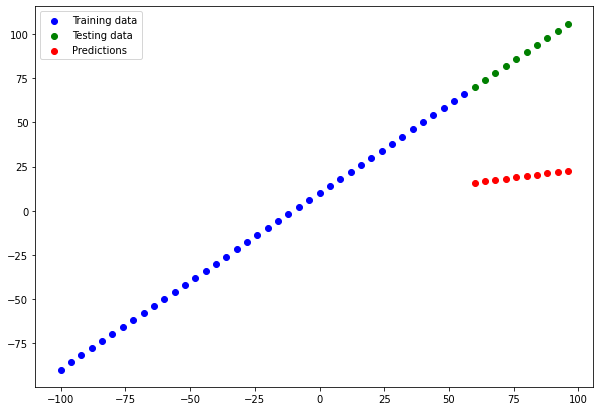

In [127]:
# Make and plot prediction for model_2
y_preds_3=model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [128]:
# Calculate model_1 evluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Comparing the result of our experiments

In [132]:
# Let's compare our model using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [133]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Saving our models

There are two main formats we can save oyr models too:
    1. The SavedModel format
    2. The HDF5 format

In [134]:
# Save model using the SavelModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [135]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

# Load in a saving model

In [136]:
# Load in a model using SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [142]:
# Compare model_2 prediction with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [155]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds 
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [144]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [145]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)

In [149]:
# Load in a model using HDF5 .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [150]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A Larger example and download from github dataset

In [1]:
# Import libraries required
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Check dtype per coloumn
insurance["age"], insurance["sex"], insurance["bmi"], insurance["smoker"], insurance["region"], insurance["charges"]

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64,
 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwe

In [5]:
# Let's try one-hot encode our DataFrame so it's all number
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [8]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [14]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 967us/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.17

34/34 [==============================] - 0s 1ms/step - loss: 7176.5205 - mae: 7176.5205
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7356.0093 - mae: 7356.0093
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 907us/step - loss: 7217.6079 - mae: 7217.6079
Epoch 88/100
34/34 [==============================] - 0s 997us/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 997us/step - loss: 7134.1553 - mae: 7134.1553
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 7083.4351 - mae: 7083.4351
Epoch 91/100
34/34 [==============================] - 0s 907us/step - loss: 7254.1782 - mae: 7254.

In [16]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)
y_train.median(), y_train.mean()

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well.... let's try improve it!

To (try) improve our model, we'll run 2 experiment:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer(200 epochs)
3. (insert your own experiment here)

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"]
                       )

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5600.6655 - mae: 5600.6655
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 5559.4326 - mae: 5559.4326
Epo

In [25]:
# Evaluate the larger model vs small model
insurance_model_2.evaluate(X_test, y_test)
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [38]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"]
                       )

# 3. Fit the model
#insurance_model_3.fit(X_train, y_train, epochs=200)
history_learn = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 1ms/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/200
34/34 [==============================] - 0s 2ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 5600.6655 - mae: 5600.6655
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 5559.4326 - mae: 5559.4326
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3728.1077 - mae: 3728.1077
Epoch 162/200
34/34 [==============================] - 0s 1ms/step - loss: 3725.3667 - mae: 3725.3667
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3722.9507 - mae: 3722.9507
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3727.0610 - mae: 3727.0610
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3717.6614 - mae: 3717.6614
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3720.3699 - mae: 3720.3699
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 3720.2910 - mae: 3720.2910
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3717.2764 - mae: 3717.2764
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3713.5598 - mae: 3713.5598
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3708.0081 - mae: 3708

In [39]:
# Evaluate the larger model 2 vs larger model 3
insurance_model_2.evaluate(X_test, y_test)
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3494.5291 - mae: 3494.5291


[3494.529052734375, 3494.529052734375]

Text(0.5, 0, 'epochs')

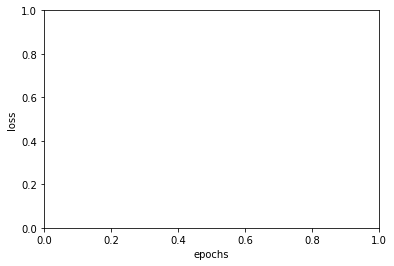

In [43]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_learn.history).plot
plt.ylabel("loss")
plt.xlabel("epochs")

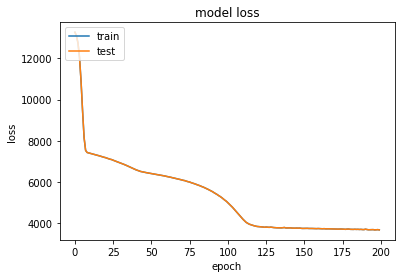

In [46]:
# Plot history (also known as a loss curve or a training curve)
plt.plot(history_learn.history['loss'])
plt.plot(history_learn.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Preprocessing data (normalization and standardization)

1. In terms of scaling values, neural networks tend to prefer normalization
2. if you're no sure on which to use, you could try both and see which performs better.

<AxesSubplot:ylabel='Frequency'>

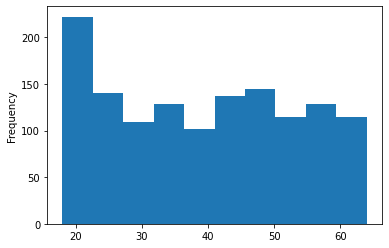

In [52]:
# Plot total number frequency of age 
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

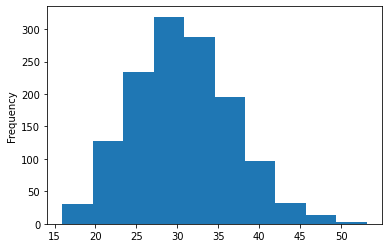

In [51]:
# Plot total number frequency of bmi
X["bmi"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

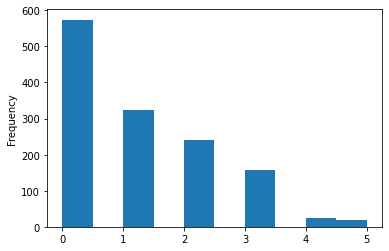

In [53]:
# Plot total number frequency of children
X["children"].plot(kind="hist")

In [54]:
# Import libraries required
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn

In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [59]:
# What does our data look like now ?
X_train.loc[0],

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,)

In [60]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [61]:
# Check shape the data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [64]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"]
                       )

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

34/34 [==============================] - 0s 2ms/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/100
34/34 [==============================] - 0s 2ms/step - loss: 3676.9763 - mae: 3676.9763
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 3664.5757 - mae: 3664.5757
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 3660.3044 - mae: 3660.3044
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 3655.2200 - mae: 3655.2200
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 3653.8831 - mae: 3653.8831
Epo

In [67]:
# Evaluate the larger model 4
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]